In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

## label

In [2]:
# test path
model = "gnoc"
test_label_path = f'/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20dense_eval_{model}_relaxed.pkl'

# train path
train_label_path = '/home/jovyan/shared-scratch/jhoon/ocp2023/clip_data/oc20_oc20dense_train_relaxed.pkl'

## embedding

In [3]:
enhancement = "gap"
path = "/home/jovyan/shared-scratch/jhoon/ocp2023/results/encoder_embedding/"
# test data
test_emb_path = path+f"emb-ssl-oc20-eqv2_1204_2048-eval-{model}-strc.pkl"
# train data
train_emb_mapping = {
                    "gap":path+"emb-ssl-oc20-eqv2_1204_2048-train-combined-strc.pkl",
                     "ca-gap":path+"emb-ssl-combined-eqv2_1207_1531-train-combined-strc.pkl",
                     }
train_emb_path = train_emb_mapping[enhancement]

## build and merge dataframe

In [4]:
dict_train_emb = pd.read_pickle(train_emb_path)
dict_test_emb = pd.read_pickle(test_emb_path)

In [5]:
df_train_emb = pd.DataFrame(list(dict_train_emb.items()), columns=['id', 'emb'])
df_test_emb = pd.DataFrame(list(dict_test_emb.items()), columns=['id', 'emb'])

In [6]:
df_train_label = pd.read_pickle(train_label_path)
df_test_label = pd.read_pickle(test_label_path)

In [7]:
df_train_label

,id,text,chg_emb,gnoc_emb,eq_emb,target
0,random1390956,NNH</s>Fe (2 1 0)</s>[N Fe atop [Fe Fe Fe Fe F...,"[28.612674713134766, 30.890628814697266, 18.05...","[1.2768959, -0.22258121, -0.15319566, 0.143419...","[0.6387, 2.033, -0.2822, 6.547, -0.0715, 2.7, ...",-0.806978
1,random1725098,COHCH2OH</s>K2Bi4 (2 1 1)</s>[O K atop [K K O]],"[86.6518325805664, -21.232860565185547, -91.62...","[2.382056, 0.42542034, 0.49615657, 0.23897597,...","[0.59, 1.979, 0.3503, 7.26, 1.0625, 4.625, 2.2...",-0.123437
2,random2417109,CCHO</s>TiRe2W (1 0 0)</s>[C Re atop [Re Re Re...,"[-33.324459075927734, -34.172752380371094, -98...","[1.5929103, -0.08675772, -0.044498686, 0.24182...","[0.1143, 1.898, -0.5, 7.15, -0.4668, -0.06195,...",-3.961441
3,random644518,CCH2OH</s>Mn8Zn14Ga27 (1 0 1)</s>[C Mn atop [M...,"[95.37297058105469, -38.111812591552734, -48.7...","[2.140949, -0.08616878, 0.2845216, 0.39688236,...","[0.54, 2.064, 1.828, 7.07, 0.4114, 1.151, 1.62...",-2.615758
4,random1086666,OHNH2</s>Ti4H6 (1 0 2)</s>[N Ti Ti bridge [Ti ...,"[40.91300582885742, -22.219594955444336, -9.19...","[1.8698424, 0.22724234, 0.052887466, -0.020242...","[0.8784, 2.473, -0.1782, 7.176, 2.701, -0.3962...",-4.816851
...,...,...,...,...,...,...
475773,17992,COHCH3</s>Sc32Te48 (1 1 0)</s>[],"[5.472529888153076, -22.680877685546875, -64.4...","[1.5052017, 2.7757068, 0.29147333, 0.368158, 0...","[1.481, 5.008, 0.0942, 7.195, -0.6543, 7.7, 2....",-0.854530
475774,4153,NH</s>Fe32Pd32 (0 0 1)</s>[N Pd Pd Pd hollow [...,"[30.221181869506836, -4.052824974060059, 0.693...","[0.79360473, -0.09183253, 0.3077638, 0.4238346...","[0.7026, 3.758, 0.1732, 6.266, -0.3926, 6.402,...",-0.195233
475775,83873,NNH</s>Sr27Ag18 (1 0 0)</s>[N Sr atop [Sr Ag N...,"[18.51088523864746, 29.268579483032227, -42.84...","[1.2514623, 1.7958908, 0.049162664, -0.0436634...","[0.6636, 3.281, -0.4844, 6.906, 0.2341, 8.47, ...",0.975504
475776,2767,CCH2</s>Ir32V32 (1 1 2)</s>[C Ir Ir bridge [Ir...,"[-7.351550579071045, 20.697553634643555, -72.5...","[2.356058, -0.2172629, 0.13081822, -0.16848373...","[0.593, 4.066, -0.11725, 6.96, -0.1273, -0.413...",-2.700992


In [9]:
df_train_label = df_train_label.drop(columns=['text', 'chg_emb', 'gnoc_emb', 'eq_emb'])
df_test_label = df_test_label.drop(columns=['text', 'chg_emb'])

# combine df_data and df_emb along with 'id' column
df_train = pd.merge(df_train_label, df_train_emb, on='id') 
df_test = pd.merge(df_test_label, df_test_emb, on='id')

In [10]:
def determine_category(id_value):
    if str(id_value).startswith('random'):
        return 'oc20-train'
    try:
        int(id_value)
        return 'dense-train'
    except ValueError:
        return None  # or some default value if 'id' can be neither 'random' nor an integer

In [11]:
df_train['category'] = df_train['id'].apply(determine_category)
df_test['category'] = 'test'

In [12]:
# sample 10000 data points from df_train['category']=='oc20-train'
df_train_oc20 = df_train[df_train['category']=='oc20-train'].sample(n=60000, random_state=1)
df_train_dense = df_train[df_train['category']=='dense-train']

df_train = pd.concat([df_train_oc20, df_train_dense], ignore_index=True)

In [13]:
# concatenate df_train and df_test
df = pd.concat([df_train, df_test])
df

,id,target,emb,category
0,random1447124,0.513016,"[0.12254074, -0.8037158, -0.42215994, -0.92434...",oc20-train
1,random1371431,-4.280351,"[-0.332702, -0.14946549, 0.6806658, 0.20207164...",oc20-train
2,random1220737,0.071719,"[-0.101938084, -0.8176482, -0.35291958, -0.331...",oc20-train
3,random2357268,1.202046,"[-0.11656435, 0.09975347, -0.4821171, 1.258137...",oc20-train
4,random1047153,-3.109664,"[-0.14516208, -0.19180109, 0.27426037, 0.21377...",oc20-train
...,...,...,...,...
11503,55536_186,-2.349694,"[0.3134737, -0.03943238, 0.09326017, -0.285356...",test
11504,84011_298,-2.974431,"[0.2045172, 0.26007923, -0.70438135, -0.498060...",test
11505,64542_152,0.239314,"[-0.22459579, 0.14825387, -0.6137538, 1.087228...",test
11506,71806_221,-1.262554,"[0.24549098, -0.1700388, -0.15096143, -0.40936...",test


In [14]:
category_counts = df['category'].value_counts()
category_counts

oc20-train     60000
dense-train    15450
test           11508
Name: category, dtype: int64

## tSNE analysis

In [15]:
perplexity = 30

In [44]:
# # Extract embeddings and targets
# embeddings = np.array(df['emb'].tolist())
# targets = df['category'].values

# # Perform t-SNE
# tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
# tsne_results = tsne.fit_transform(embeddings)

# # Create a new DataFrame for t-SNE results
# tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
# tsne_df['category'] = targets

In [16]:
# Extract embeddings and targets
embeddings = np.array(df['emb'].tolist())
targets = df['category'].values

# Wrap t-SNE in a function
def run_tsne(embeddings, perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    return tsne.fit_transform(embeddings)

# Use tqdm to estimate time
with tqdm(total=1, desc="Running t-SNE") as pbar:
    tsne_results = run_tsne(embeddings, perplexity)
    pbar.update(1)  # manually update the progress

# Create a new DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
tsne_df['category'] = targets

Running t-SNE: 100%|██████████| 1/1 [23:06<00:00, 1386.64s/it]


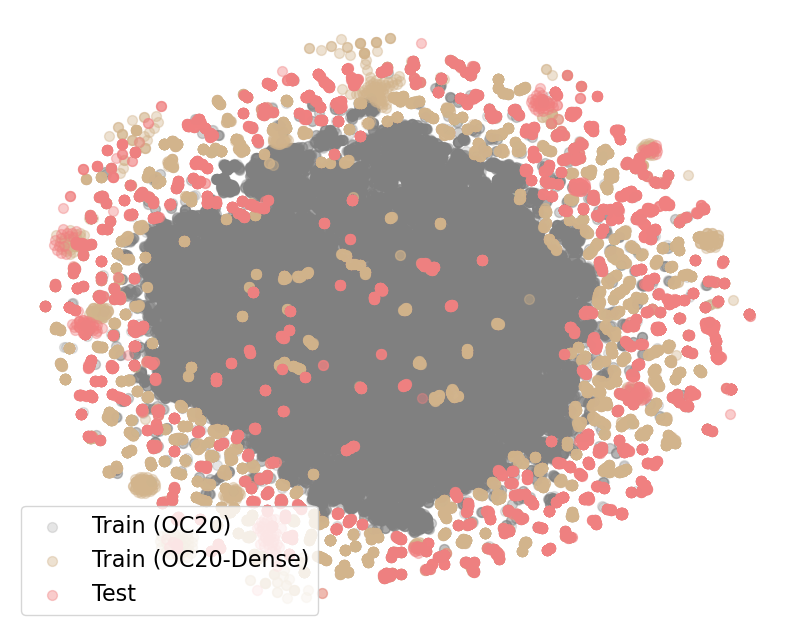

In [24]:
# Plot the t-SNE results
fig, ax = plt.subplots(figsize=(10, 8))

# Define categories and their corresponding colors from the 'tab10' colormap
categories = ['oc20-train', 'dense-train', 'test']
legend_mapping = {'oc20-train':'Train (OC20)', 'dense-train':'Train (OC20-Dense)', 'test':'Test'}
#colors = plt.cm.plasma(np.linspace(0, 0.9, len(categories)))

custom_colors = {
    'oc20-train': ('grey', 0.2),  # Grey color with alpha=0.2 for 'oc20-train'
    'dense-train': ('tan', 0.4), # Brown color for 'dense-train'
    'test': ('lightcoral', 0.4)       # Orange color for 'test'
}

# Scatter plot for each category
# for category, color in zip(categories, colors):
for category in categories:
    subset = tsne_df[tsne_df['category'] == category]
    legend_text = legend_mapping.get(category, category)
    # Get custom color and alpha for each category
    color, alpha = custom_colors.get(category, (None, 0.7))

    ax.scatter(subset['tsne1'], subset['tsne2'], c=[color], label=legend_text, s=50, alpha=alpha)


# Adding the legend
ax.legend(fontsize=16, loc='lower left')

# Remove box frame, ticks, and labels
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()
fig.savefig(f"dataset/__train-{enhancement}-test-{model}-p{perplexity}.png", dpi=300, bbox_inches='tight')